<a href="https://colab.research.google.com/github/FarhodjonJaborov/times_series_forecasting/blob/main/Datahack_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/DataHack/1510001_agr.csv")
data_2 = pd.read_csv("/content/drive/MyDrive/DataHack/1510002_agr.csv")
data_3 = pd.read_csv("/content/drive/MyDrive/DataHack/1510003_agr.csv")
promo_data = pd.read_csv("/content/drive/MyDrive/DataHack/promo_1510002.csv")
sku_dict = pd.read_csv("/content/drive/MyDrive/DataHack/sku_dict.csv")
zx_df = pd.read_csv("/content/drive/MyDrive/DataHack/ZX10208_agr.csv")
conc_df = pd.read_csv("/content/drive/MyDrive/DataHack/conc_df.csv")

# Data_1

In [ ]:
data_1.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-08-02,39665,85.940,1
1,2018-08-03,39665,85.940,1
2,2018-08-04,39665,85.940,1
3,2018-08-05,39665,85.940,1
4,2018-08-06,39665,86.038,1


In [ ]:
data_1.shape

(3940, 4)

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          3940 non-null   object 
 1   SKU            3940 non-null   int64  
 2   price_per_sku  3940 non-null   float64
 3   num_purchases  3940 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 123.2+ KB


In [ ]:
data_1.describe()

,SKU,price_per_sku,num_purchases
count,3940.000000,3940.00000,3940.000000
mean,49973.048223,104.63519,1.555076
std,14838.772129,27.88464,0.716655
min,27240.000000,63.00000,1.000000
25%,39665.000000,78.40300,1.000000
50%,45164.000000,102.13500,1.000000
75%,63995.000000,133.46450,2.000000
max,72449.000000,156.47400,3.000000


In [ ]:
data_1.columns

Index(['dates', 'SKU', 'price_per_sku', 'num_purchases'], dtype='object')

In [ ]:
data_1.isnull().sum()/len(data_1)*100

dates            0.0
SKU              0.0
price_per_sku    0.0
num_purchases    0.0
dtype: float64

In [ ]:
data_1.dates = pd.to_datetime(data_1.dates)

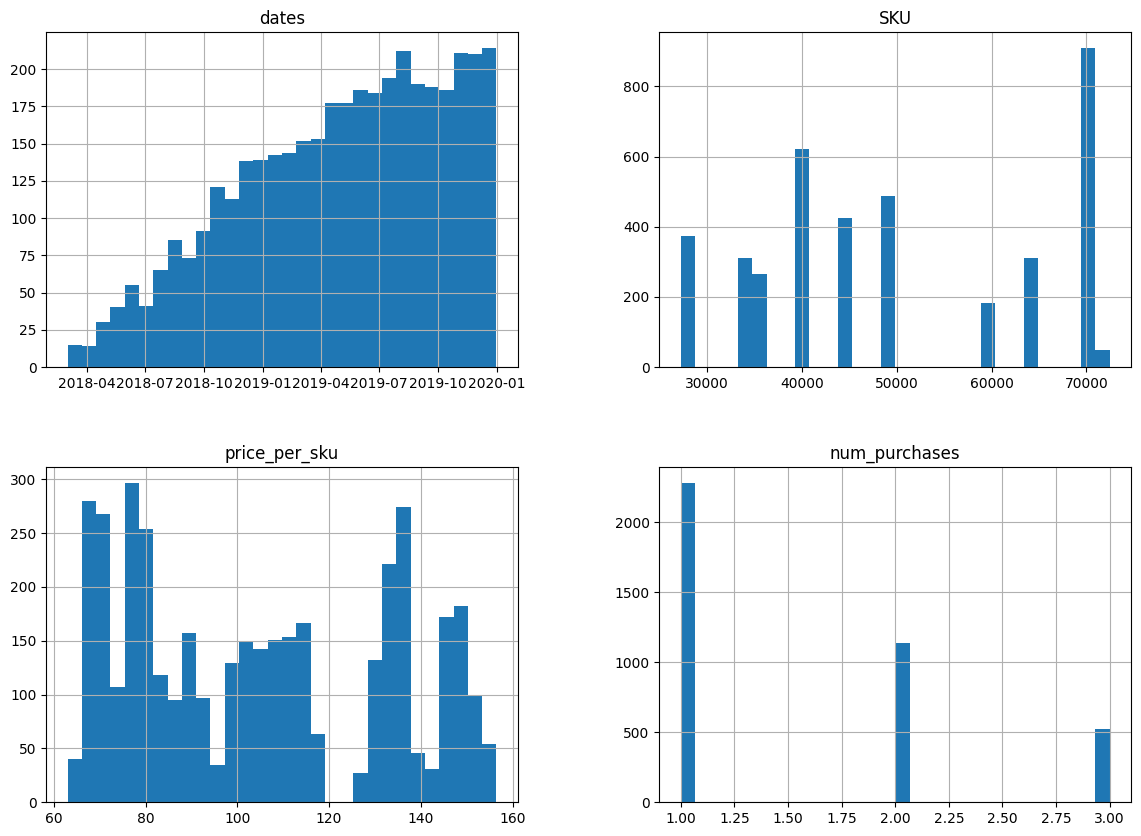

In [ ]:
%matplotlib inline
data_1.hist(bins=30, figsize=(14,10))
plt.show()

# Data_2

In [ ]:
data_2.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-01-24,72784,124.294,9
1,2018-01-25,72784,124.294,9
2,2018-01-27,72784,124.294,7
3,2018-01-28,72784,124.294,7
4,2018-01-29,72784,124.420,9


In [ ]:
data_2.shape

(3840, 4)

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840 entries, 0 to 3839
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          3840 non-null   object 
 1   SKU            3840 non-null   int64  
 2   price_per_sku  3840 non-null   float64
 3   num_purchases  3840 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 120.1+ KB


In [ ]:
data_2.isnull().sum()/len(data_2)*100

dates            0.0
SKU              0.0
price_per_sku    0.0
num_purchases    0.0
dtype: float64

In [ ]:
data_2.columns

Index(['dates', 'SKU', 'price_per_sku', 'num_purchases'], dtype='object')

In [ ]:
data_2.describe()

,SKU,price_per_sku,num_purchases
count,3840.000000,3840.000000,3840.000000
mean,55001.609635,103.480992,7.994271
std,26917.854232,29.643981,2.554224
min,10334.000000,61.064000,2.000000
25%,38767.000000,82.745000,6.000000
50%,57561.000000,94.234000,8.000000
75%,72784.000000,130.251000,10.000000
max,98255.000000,166.056000,16.000000


In [ ]:
data_2.dates = pd.to_datetime(data_2.dates)

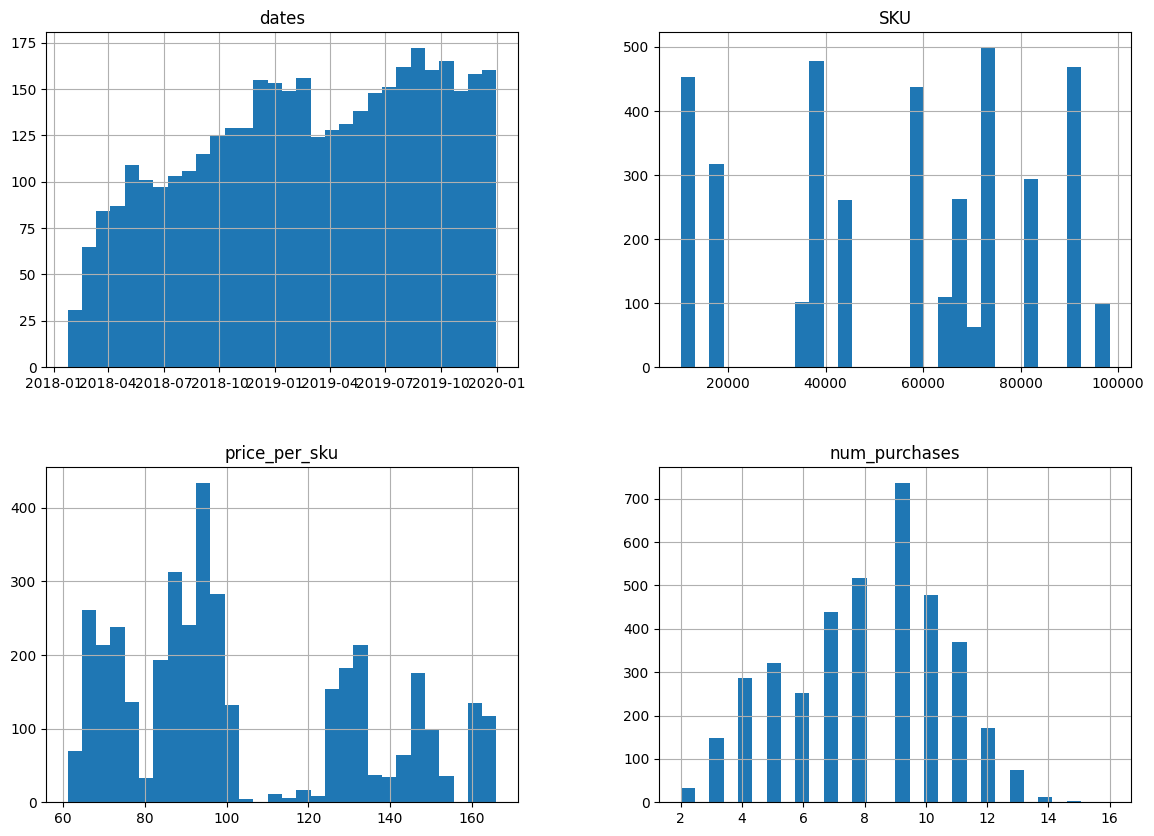

In [ ]:
data_2.hist(bins=30, figsize=(14,10))
plt.show()

# Data_3

In [ ]:
data_3.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12
2,2018-11-19,54404,81.796,10
3,2018-11-20,54404,81.796,11
4,2018-11-21,54404,81.796,10


In [ ]:
data_3.shape

(2851, 4)

In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          2851 non-null   object 
 1   SKU            2851 non-null   int64  
 2   price_per_sku  2851 non-null   float64
 3   num_purchases  2851 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 89.2+ KB


In [ ]:
data_3.isnull().sum()/len(data_3)*100

dates            0.0
SKU              0.0
price_per_sku    0.0
num_purchases    0.0
dtype: float64

In [ ]:
data_3.columns

Index(['dates', 'SKU', 'price_per_sku', 'num_purchases'], dtype='object')

In [ ]:
data_3.describe()

,SKU,price_per_sku,num_purchases
count,2851.000000,2851.000000,2851.000000
mean,61507.831638,118.204992,7.803928
std,27604.967320,20.972256,1.741485
min,11050.000000,76.000000,5.000000
25%,49661.000000,106.734000,7.000000
50%,80308.000000,116.936000,8.000000
75%,84395.000000,132.415000,9.000000
max,89272.000000,165.978000,14.000000


In [ ]:
data_3.dates = pd.to_datetime(data_3.dates)

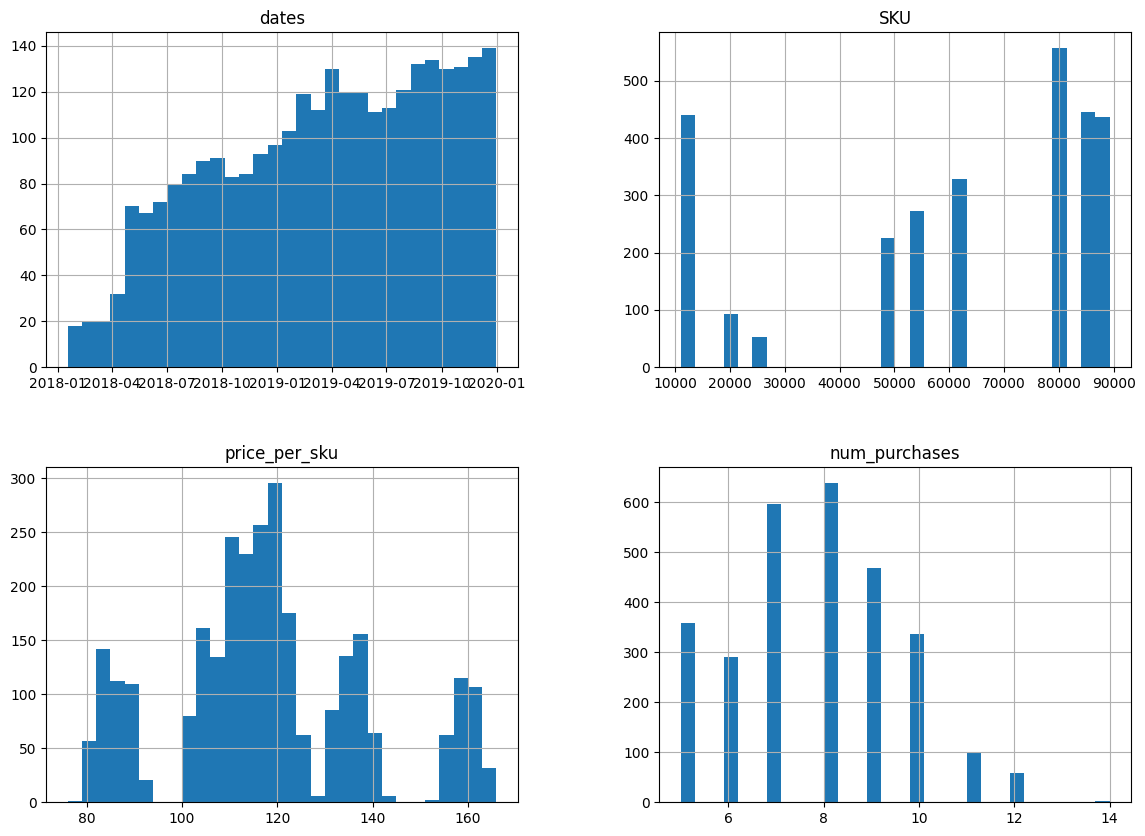

In [ ]:
data_3.hist(bins=30, figsize=(14,10))
plt.show()

# Promo_data

In [ ]:
promo_data.head()

,year,week_num,SKU,discount
0,2019,1,90611,0.9
1,2019,2,10334,0.9
2,2019,3,68211,0.9
3,2019,4,10334,0.9
4,2019,5,72784,0.8


In [ ]:
promo_data.shape

(52, 4)

In [ ]:
promo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      52 non-null     int64  
 1   week_num  52 non-null     int64  
 2   SKU       52 non-null     int64  
 3   discount  52 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.8 KB


In [ ]:
promo_data.isnull().sum()/len(promo_data)*100

year        0.0
week_num    0.0
SKU         0.0
discount    0.0
dtype: float64

In [ ]:
promo_data.columns

Index(['year', 'week_num', 'SKU', 'discount'], dtype='object')

In [ ]:
promo_data.describe()

,year,week_num,SKU,discount
count,52.0,52.000000,52.000000,52.000000
mean,2019.0,26.500000,47268.653846,0.897115
std,0.0,15.154757,27554.128483,0.052779
min,2019.0,1.000000,10334.000000,0.800000
25%,2019.0,13.750000,17812.000000,0.900000
50%,2019.0,26.500000,43678.000000,0.900000
75%,2019.0,39.250000,69997.000000,0.950000
max,2019.0,52.000000,90611.000000,0.950000


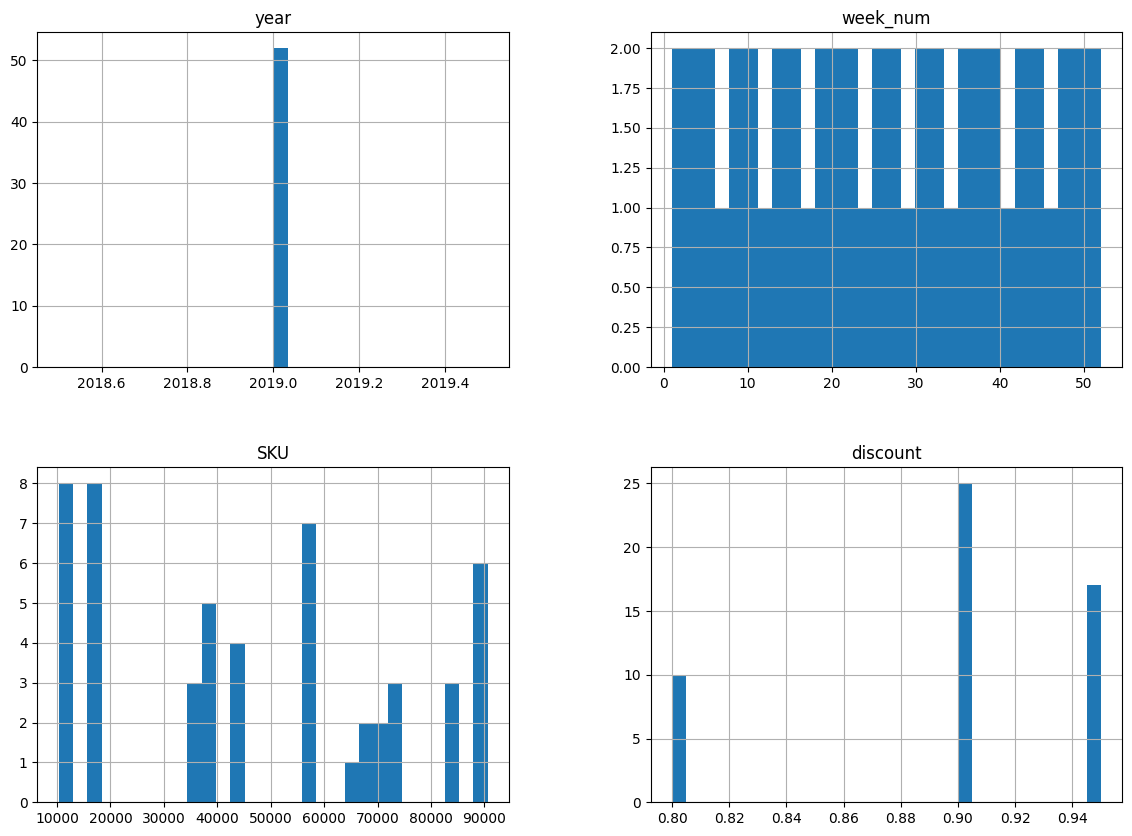

In [ ]:
promo_data.hist(bins=30, figsize=(14,10))
plt.show()

# Sku_dict

In [ ]:
sku_dict.head()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00
2,33513,G9,G91,G9100,G910003,7I77VL,MMC2P4Y3,2018-07-21,2200-01-01 00:00:00
3,47505,AQ,AQ1,AQ100,AQ10000,4HJSP5,8FYENEWM,2018-03-26,2200-01-01 00:00:00
4,53350,6L,6L1,6L100,6L10005,JSOSD5,YTE7JS4H,2018-11-30,2200-01-01 00:00:00


In [ ]:
sku_dict.shape

(10000, 9)

In [ ]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


In [ ]:
sku_dict.isnull().sum()/len(sku_dict)*100

sku_id             0.0
fincode            0.0
ui1_code           0.0
ui2_code           0.0
ui3_code           0.0
vendor             0.0
brand_code         0.0
creation_date      0.0
expiration_date    0.0
dtype: float64

In [ ]:
sku_dict.columns

Index(['sku_id', 'fincode', 'ui1_code', 'ui2_code', 'ui3_code', 'vendor',
       'brand_code', 'creation_date', 'expiration_date'],
      dtype='object')

In [ ]:
sku_dict.describe()

,sku_id
count,10000.000000
mean,54923.445700
std,26030.050992
min,10003.000000
25%,32338.500000
50%,54936.500000
75%,77088.250000
max,99997.000000


In [ ]:
sku_dict.creation_date = pd.to_datetime(sku_dict.creation_date)
sku_dict.expiration_date = pd.to_datetime(sku_dict.expiration_date)

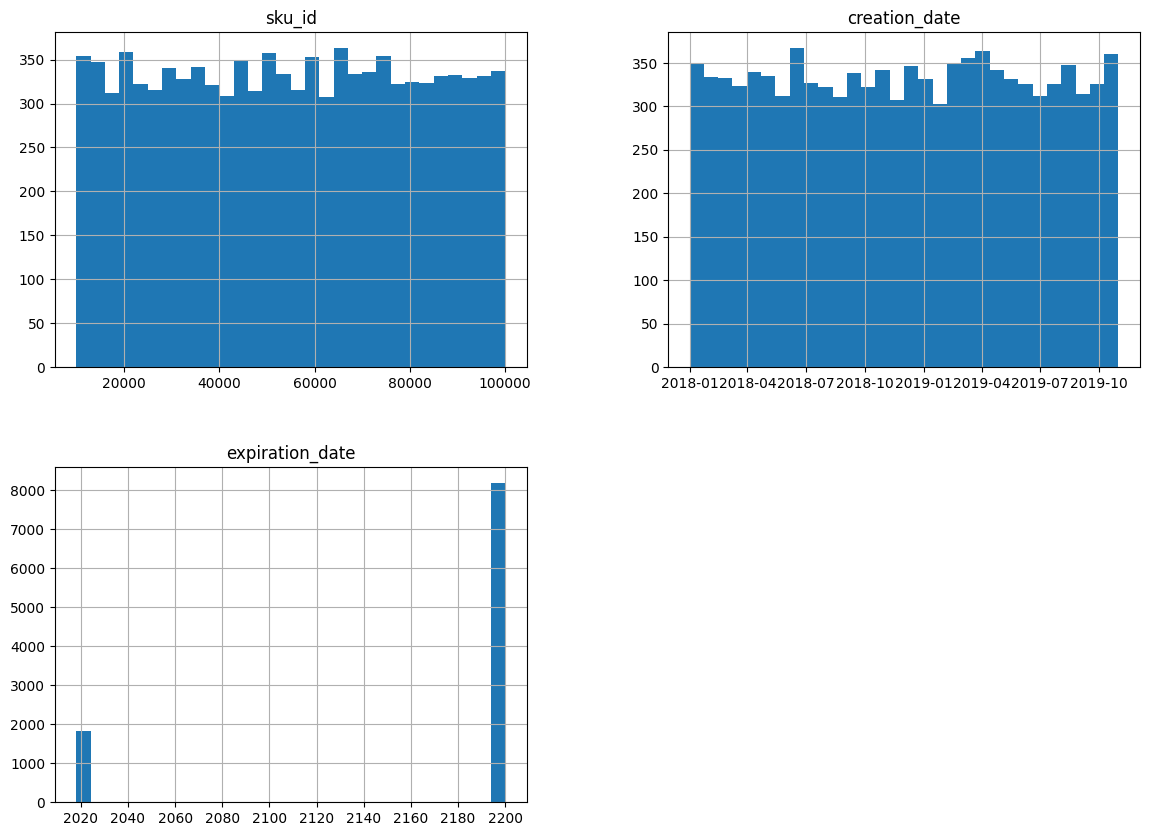

In [ ]:
sku_dict.hist(bins=30, figsize=(14,10))
plt.show()

# Zx_df

In [ ]:
zx_df.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2


In [ ]:
zx_df.shape

(259, 4)

In [ ]:
zx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          259 non-null    object 
 1   SKU            259 non-null    int64  
 2   price_per_sku  181 non-null    float64
 3   num_purchases  259 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 8.2+ KB


In [ ]:
zx_df.isnull().sum()/len(zx_df)*100

dates             0.00000
SKU               0.00000
price_per_sku    30.11583
num_purchases     0.00000
dtype: float64

In [ ]:
zx_df['price_per_sku'].value_counts().sum()

181

In [ ]:
zx_df["price_per_sku"].fillna(zx_df["price_per_sku"].mean(), inplace=True)

In [ ]:
zx_df.isnull().sum()/len(zx_df)*100

dates            0.0
SKU              0.0
price_per_sku    0.0
num_purchases    0.0
dtype: float64

In [ ]:
zx_df.columns

Index(['dates', 'SKU', 'price_per_sku', 'num_purchases'], dtype='object')

In [ ]:
zx_df.describe()

,SKU,price_per_sku,num_purchases
count,259.000000,259.000000,259.000000
mean,68864.837838,190.368729,1.467181
std,11464.778890,10.040615,0.654356
min,59567.000000,169.190000,1.000000
25%,59567.000000,183.490000,1.000000
50%,59567.000000,190.368729,1.000000
75%,82947.000000,196.525000,2.000000
max,82947.000000,216.300000,3.000000


In [ ]:
zx_df.dates = pd.to_datetime(zx_df.dates)

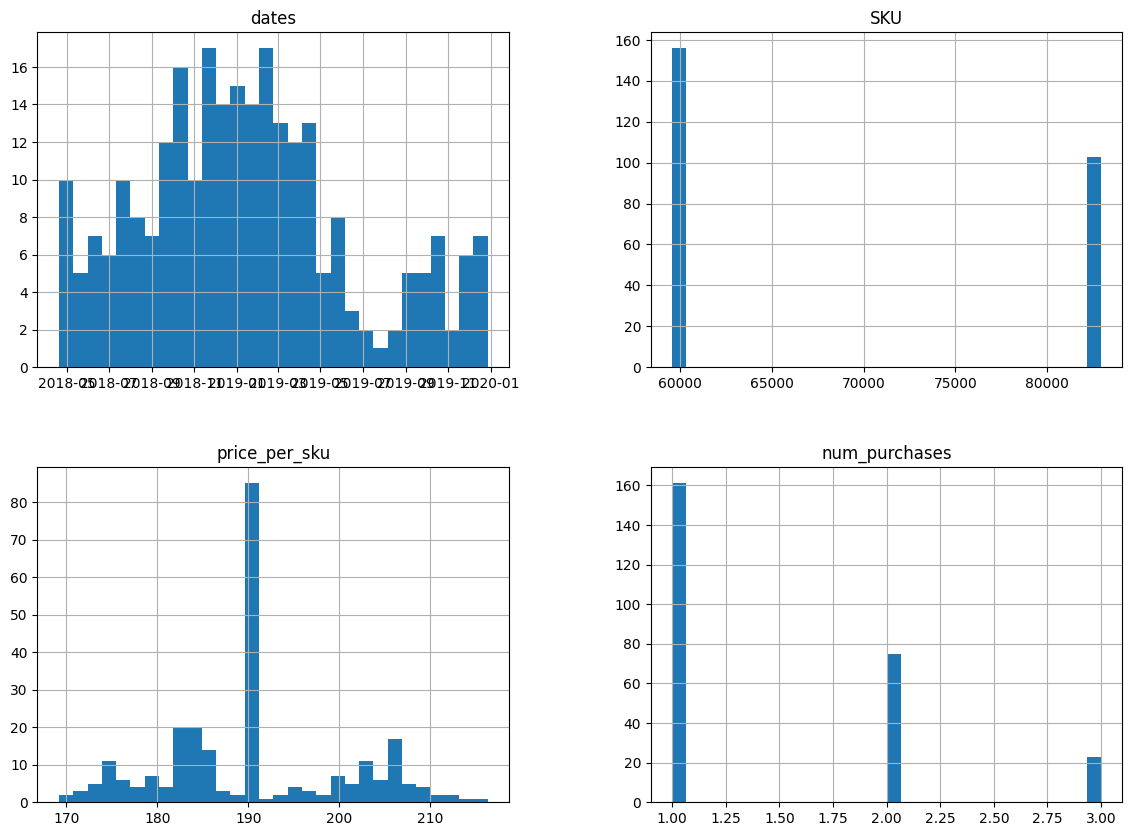

In [ ]:
zx_df.hist(bins=30, figsize=(14,10))
plt.show()

# Conc_df

In [ ]:
conc_df.head()

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.69400
1,84395,2019,18,2,164.69400
2,84395,2019,18,3,134.50010
3,84395,2019,22,1,165.19800
4,84395,2019,22,2,136.28835


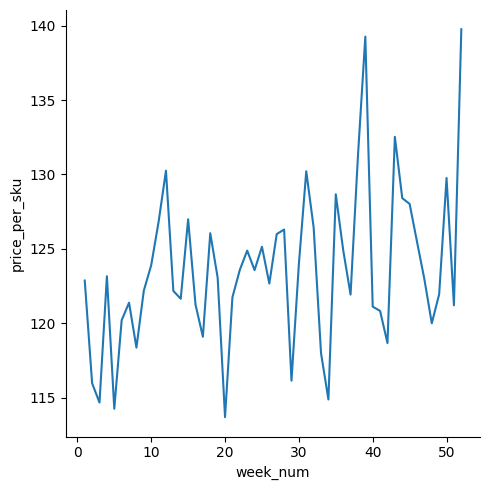

In [ ]:
# @title Average Price per SKU over Time

sns.relplot(x="week_num", y="price_per_sku", data=conc_df, kind="line", ci=None)

In [ ]:
conc_df.shape

(3009, 5)

In [ ]:
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SKU            3009 non-null   int64  
 1   year           3009 non-null   int64  
 2   week_num       3009 non-null   int64  
 3   ret_net_code   3009 non-null   int64  
 4   price_per_sku  3009 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 117.7 KB


In [ ]:
conc_df.isnull().sum()/len(conc_df)*100

SKU              0.0
year             0.0
week_num         0.0
ret_net_code     0.0
price_per_sku    0.0
dtype: float64

In [ ]:
conc_df.columns

Index(['SKU', 'year', 'week_num', 'ret_net_code', 'price_per_sku'], dtype='object')

In [ ]:
conc_df.describe()

,SKU,year,week_num,ret_net_code,price_per_sku
count,3009.000000,3009.0,3009.000000,3009.000000,3009.000000
mean,60592.739781,2019.0,27.379860,2.000000,123.733552
std,27083.637512,0.0,15.086726,0.816632,27.112283
min,11050.000000,2019.0,1.000000,1.000000,78.040320
25%,49661.000000,2019.0,15.000000,1.000000,105.473920
50%,80308.000000,2019.0,28.000000,2.000000,119.996160
75%,84395.000000,2019.0,41.000000,3.000000,141.186000
max,89272.000000,2019.0,52.000000,3.000000,199.173600


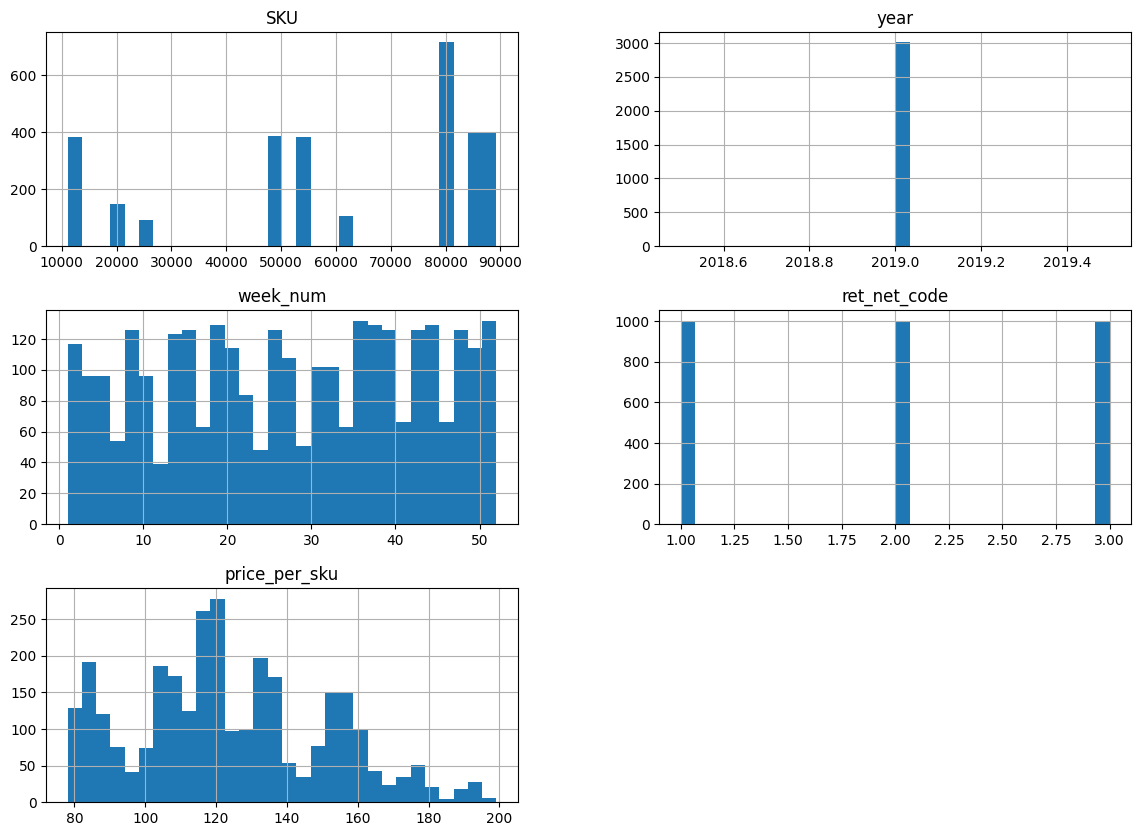

In [ ]:
conc_df.hist(bins=30, figsize=(14,10))
plt.show()

# Groupby

In [ ]:
df = pd.concat([data_1, data_2, data_3, zx_df])

In [ ]:
df['year'] = df['dates'].dt.year
df['week_num'] = df['dates'].dt.strftime('%U')
df['month'] = df['dates'].dt.month
df['year_week'] = df['year'].astype(str) + '_' + df['week_num']

In [ ]:
df.head()

,dates,SKU,price_per_sku,num_purchases,year,week_num,month,year_week
0,2018-08-02,39665,85.940,1,2018,30,8,2018_30
1,2018-08-03,39665,85.940,1,2018,30,8,2018_30
2,2018-08-04,39665,85.940,1,2018,30,8,2018_30
3,2018-08-05,39665,85.940,1,2018,31,8,2018_31
4,2018-08-06,39665,86.038,1,2018,31,8,2018_31


In [ ]:
df1_gr = df.groupby(['year_week', 'SKU']).price_per_sku.mean().reset_index()
df1_gr = df1_gr.rename(columns={'price_per_sku': 'mean_per_week'})
df1 = df.merge(df1_gr, how='left', on=['year_week', 'SKU'])

In [ ]:
df1.head()

,dates,SKU,price_per_sku,num_purchases,year,week_num,month,year_week,mean_per_week
0,2018-08-02,39665,85.940,1,2018,30,8,2018_30,85.9400
1,2018-08-03,39665,85.940,1,2018,30,8,2018_30,85.9400
2,2018-08-04,39665,85.940,1,2018,30,8,2018_30,85.9400
3,2018-08-05,39665,85.940,1,2018,31,8,2018_31,86.0135
4,2018-08-06,39665,86.038,1,2018,31,8,2018_31,86.0135


In [ ]:
promo_data.discount = 1 - promo_data.discount

In [ ]:
promo_data['SKU'] = promo_data['SKU'].astype(int)
promo_data['year'] = promo_data['year'].astype(int)
df1['week_num'] = df1['week_num'].astype(int)

In [ ]:
merged_df = df1.merge(promo_data, how='left', on=['SKU', 'year', 'week_num'])

In [ ]:
merged_df.columns = merged_df.columns.str.replace('_x', '').str.replace('_y', '')

In [ ]:
merged_df.head()

,dates,SKU,price_per_sku,num_purchases,year,week_num,month,year_week,mean_per_week,discount
0,2018-08-02,39665,85.940,1,2018,30,8,2018_30,85.9400,NaN
1,2018-08-03,39665,85.940,1,2018,30,8,2018_30,85.9400,NaN
2,2018-08-04,39665,85.940,1,2018,30,8,2018_30,85.9400,NaN
3,2018-08-05,39665,85.940,1,2018,31,8,2018_31,86.0135,NaN
4,2018-08-06,39665,86.038,1,2018,31,8,2018_31,86.0135,NaN


In [ ]:
merged_df['real_price_per_sku'] = merged_df.price_per_sku * (1+merged_df.discount)

In [ ]:
merged_df[~merged_df.discount.isnull()]

,dates,SKU,price_per_sku,num_purchases,year,week_num,month,year_week,mean_per_week,discount,real_price_per_sku
5503,2019-01-07,90611,88.8230,4,2019,1,1,2019_01,88.8230,0.1,97.70530
5507,2019-01-08,90611,88.8230,6,2019,1,1,2019_01,88.8230,0.1,97.70530
5518,2019-01-09,90611,88.8230,4,2019,1,1,2019_01,88.8230,0.1,97.70530
5519,2019-01-10,90611,88.8230,5,2019,1,1,2019_01,88.8230,0.1,97.70530
5560,2019-01-17,10334,97.8040,9,2019,2,1,2019_02,97.8040,0.1,107.58440
...,...,...,...,...,...,...,...,...,...,...,...
7725,2019-12-23,17812,77.3730,2,2019,51,12,2019_51,77.3730,0.1,85.11030
7749,2019-12-26,17812,77.3730,3,2019,51,12,2019_51,77.3730,0.1,85.11030
7751,2019-12-27,17812,77.3730,3,2019,51,12,2019_51,77.3730,0.1,85.11030
7761,2019-12-28,17812,77.3730,4,2019,51,12,2019_51,77.3730,0.1,85.11030


In [ ]:
merged_df = df1.merge(conc_df, how='left', on=['SKU', 'year', 'price_per_sku'])

In [ ]:
df = merged_df[['dates', 'SKU', 'price_per_sku']]

In [ ]:
sku_dict.groupby(['fincode', 'ui1_code', 'ui3_code']).sku_id.agg('count').reset_index().sort_values('fincode')

,fincode,ui1_code,ui3_code,sku_id
0,15,151,1510000,123
23,15,151,1510208,4
22,15,151,1510207,2
21,15,151,1510206,2
20,15,151,1510205,1
...,...,...,...,...
777,ZX,ZX1,ZX10000,112
776,ZX,ZX0,ZX00100,1
802,ZX,ZX1,ZX10207,1
788,ZX,ZX1,ZX10102,3


# Train_df, test_df

In [ ]:
df_70252 = df[df.SKU == 70252]

In [ ]:
train_df = df_70252[df_70252.dates <= pd.to_datetime('2019-04-01')]
test_df = df_70252[df_70252.dates > pd.to_datetime('2019-04-01')]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(282, 3)
(198, 3)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

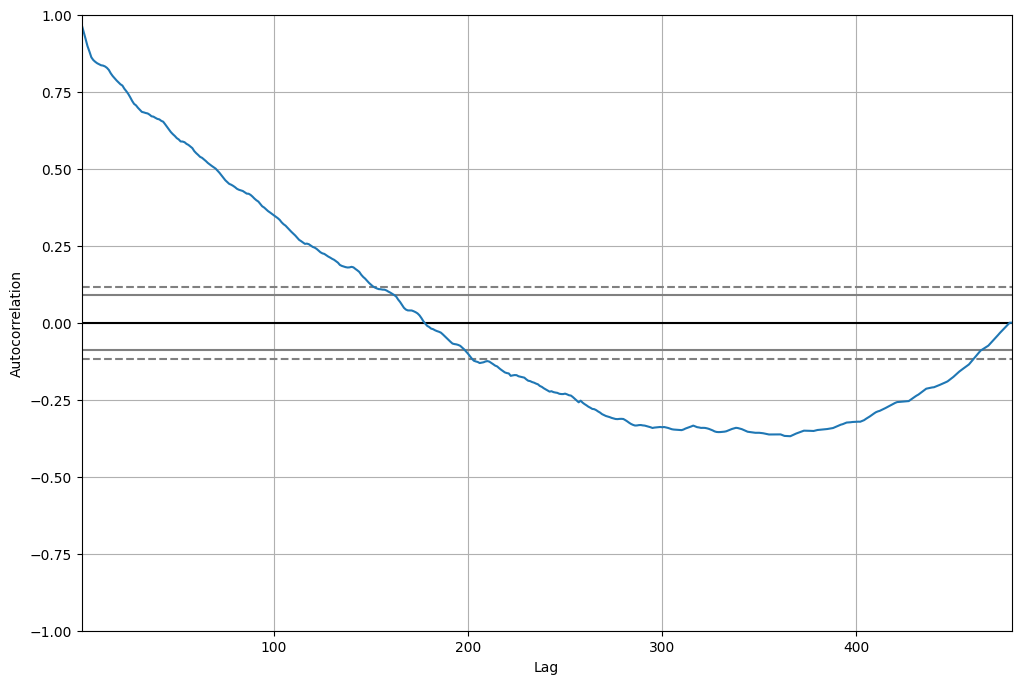

In [ ]:
plt.figure(figsize=(12,8))
autocorrelation_plot(df_70252.price_per_sku.values)

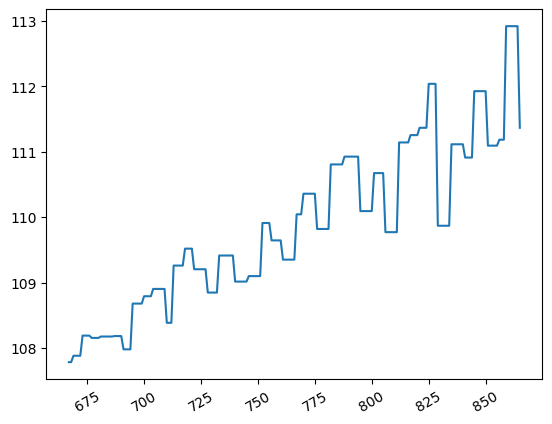

In [ ]:
plt.plot(train_df[1:200]['price_per_sku'])
plt.xticks(rotation = 30)
plt.show()

<Figure size 1200x800 with 0 Axes>

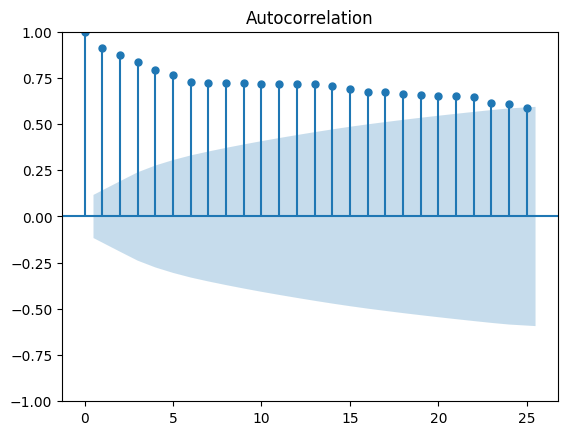

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 8))
plot_acf(train_df.price_per_sku.values)
plt.show()

# Times Series Forecasting

*Autoregression![Plan_spros.png](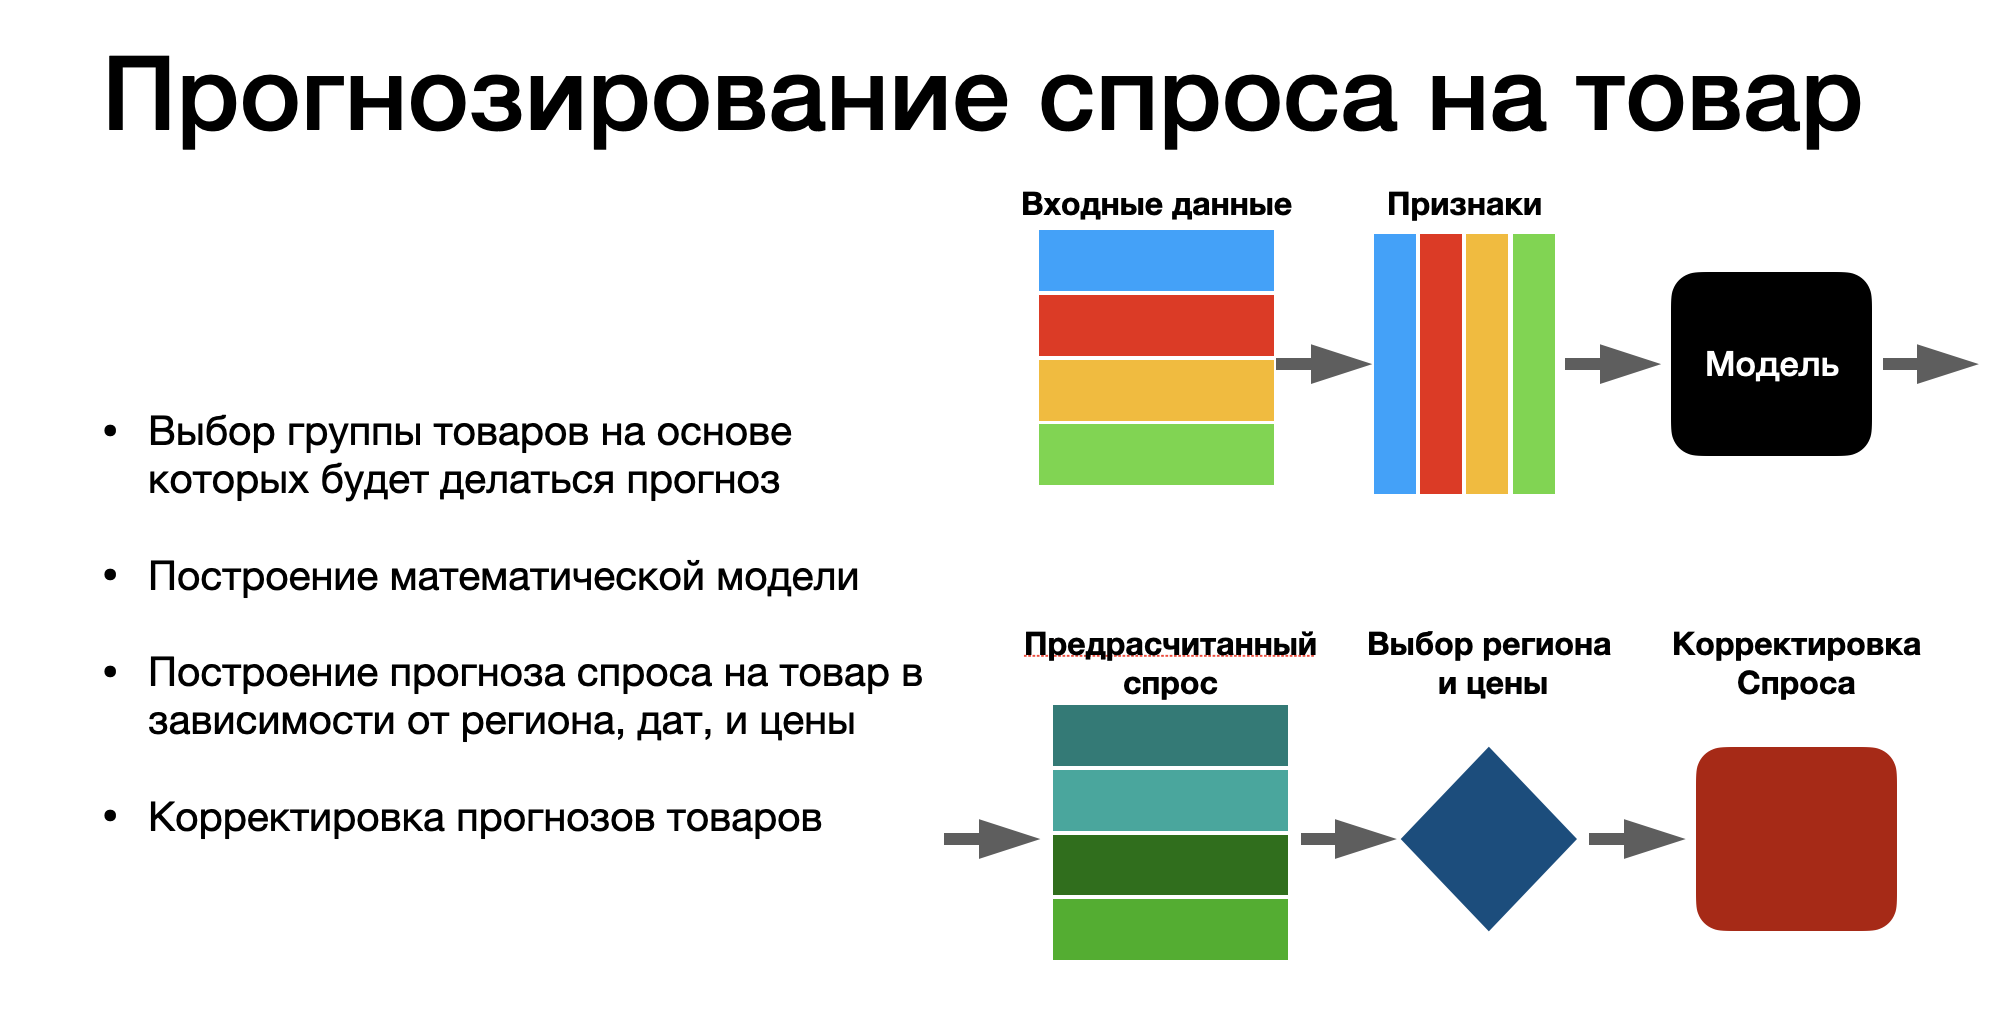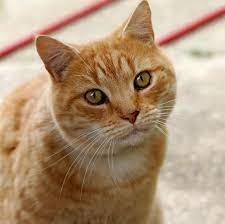)*

In [ ]:
AR = AutoReg(train_df.price_per_sku.values, lags=20)
AR_model = AR.fit()

In [ ]:
AR_model.params

array([ 1.3452338 ,  0.52458995,  0.18490507,  0.05164688, -0.06369635,
        0.04397634, -0.18871571,  0.04841038,  0.0619554 ,  0.07044504,
       -0.07823316,  0.04743686,  0.04433487,  0.07284099,  0.04739671,
       -0.00879304, -0.11721527,  0.08448344,  0.04556398,  0.04320869,
        0.07434519])

In [ ]:
AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1,
                 dynamic=False)

array([113.72582724, 113.56468375, 113.45675598, 113.36026164,
       113.22842556, 113.07057038, 113.13778421, 113.2525505 ,
       113.39241305, 113.40620636, 113.39040523, 113.49189308,
       113.5657627 , 113.61437169, 113.66399308, 113.63723156,
       113.73798551, 113.75096638, 113.74353325, 113.77245736,
       113.75929213, 113.76990517, 113.72731004, 113.68298064,
       113.64886005, 113.6449221 , 113.66032   , 113.67530537,
       113.71163714, 113.74815091, 113.78894053, 113.83132951,
       113.85368083, 113.88381681, 113.90716549, 113.91529292,
       113.92670141, 113.92803217, 113.93705457, 113.94845539,
       113.9570285 , 113.96552156, 113.97099093, 113.97755258,
       113.98233696, 113.99028114, 114.00044529, 114.01402508,
       114.03253103, 114.05050638, 114.0706411 , 114.0919672 ,
       114.11142812, 114.13068338, 114.14611262, 114.15856583,
       114.16954929, 114.17852785, 114.18767472, 114.19708025,
       114.2074919 , 114.21866275, 114.23042528, 114.24

In [ ]:
test_df['AR_model_prediction'] = AR_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1,
                 dynamic=False)

In [ ]:
test_df

,dates,SKU,price_per_sku,AR_model_prediction
948,2019-04-02,70252,114.280,113.725827
949,2019-04-05,70252,114.280,113.564684
950,2019-04-07,70252,114.280,113.456756
951,2019-04-08,70252,114.392,113.360262
952,2019-04-09,70252,114.392,113.228426
...,...,...,...,...
1141,2019-12-24,70252,117.815,115.729456
1142,2019-12-25,70252,117.815,115.739503
1143,2019-12-26,70252,117.815,115.749531
1144,2019-12-28,70252,117.815,115.759539


*Moving Avarage*

In [ ]:
MA = ARIMA(train_df.price_per_sku.values, order=(0,0,20))
MA_model = MA.fit()

In [ ]:
MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([113.9130509 , 113.63424927, 113.12434885, 112.93101372,
       112.97616528, 112.6412721 , 112.36309561, 112.32055736,
       112.56417227, 112.41560137, 112.03692878, 111.87274825,
       111.98547119, 111.92195624, 111.43737232, 111.10106914,
       111.05000432, 110.99315315, 110.81430367, 110.62493748,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62949974,
       110.62949974, 110.62949974, 110.62949974, 110.62

In [ ]:
test_df['MA_model_prediction'] = MA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df

,dates,SKU,price_per_sku,AR_model_prediction,MA_model_prediction
948,2019-04-02,70252,114.280,113.725827,113.913051
949,2019-04-05,70252,114.280,113.564684,113.634249
950,2019-04-07,70252,114.280,113.456756,113.124349
951,2019-04-08,70252,114.392,113.360262,112.931014
952,2019-04-09,70252,114.392,113.228426,112.976165
...,...,...,...,...,...
1141,2019-12-24,70252,117.815,115.729456,110.629500
1142,2019-12-25,70252,117.815,115.739503,110.629500
1143,2019-12-26,70252,117.815,115.749531,110.629500
1144,2019-12-28,70252,117.815,115.759539,110.629500


*Autoregressive moving average(ARMA)*

In [ ]:
ARMA = ARIMA(train_df.price_per_sku.values, order=(1,0,1))
ARMA_model = ARMA.fit()

In [ ]:
ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([113.97602952, 113.90311043, 113.83180452, 113.7620761 ,
       113.69389028, 113.62721293, 113.56201067, 113.49825087,
       113.43590162, 113.37493172, 113.31531065, 113.25700857,
       113.1999963 , 113.1442453 , 113.08972768, 113.03641615,
       112.98428402, 112.9333052 , 112.88345418, 112.83470601,
       112.78703629, 112.74042116, 112.6948373 , 112.65026188,
       112.60667259, 112.56404763, 112.52236566, 112.48160581,
       112.44174768, 112.40277134, 112.36465726, 112.32738637,
       112.29094003, 112.25529998, 112.22044839, 112.18636783,
       112.15304122, 112.12045189, 112.08858353, 112.0574202 ,
       112.02694628, 111.99714654, 111.96800605, 111.93951024,
       111.91164483, 111.88439589, 111.85774977, 111.83169314,
       111.80621296, 111.78129648, 111.75693121, 111.73310498,
       111.70980586, 111.68702218, 111.66474253, 111.64295578,
       111.62165102, 111.60081757, 111.58044503, 111.56052318,
       111.54104206, 111.52199192, 111.50336323, 111.48

In [ ]:
test_df['ARMA_model_prediction'] = ARMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df

,dates,SKU,price_per_sku,AR_model_prediction,MA_model_prediction,ARMA_model_prediction
948,2019-04-02,70252,114.280,113.725827,113.913051,113.976030
949,2019-04-05,70252,114.280,113.564684,113.634249,113.903110
950,2019-04-07,70252,114.280,113.456756,113.124349,113.831805
951,2019-04-08,70252,114.392,113.360262,112.931014,113.762076
952,2019-04-09,70252,114.392,113.228426,112.976165,113.693890
...,...,...,...,...,...,...
1141,2019-12-24,70252,117.815,115.729456,110.629500,110.723877
1142,2019-12-25,70252,117.815,115.739503,110.629500,110.722905
1143,2019-12-26,70252,117.815,115.749531,110.629500,110.721954
1144,2019-12-28,70252,117.815,115.759539,110.629500,110.721025


*Autoregressive Integrated Moving Average*

In [ ]:
ARIMA_ = ARIMA(train_df.price_per_sku.values, order=(20,1,20))
ARIMA_model = ARIMA_.fit()

In [ ]:
ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([113.93811174, 113.64214966, 113.21295041, 113.02664587,
       113.17874954, 113.33381219, 113.2344551 , 113.41612248,
       113.54143883, 113.26770241, 113.33123449, 113.75784115,
       113.68428546, 113.49172996, 113.49619695, 113.48025648,
       113.80029949, 113.67100614, 113.8531826 , 113.90960834,
       113.67912002, 113.95635587, 113.94346679, 113.94936993,
       113.87522377, 113.79779934, 113.70984984, 113.73117576,
       113.91771334, 113.99707194, 113.93053576, 113.75228594,
       113.9287886 , 113.95790056, 113.79384935, 113.85442165,
       113.82563119, 113.7177029 , 113.77417536, 113.82077506,
       113.96384418, 113.89750229, 113.72359662, 113.87802634,
       113.80082769, 113.83683416, 113.89792092, 113.78765953,
       113.76577038, 113.76878833, 113.84458332, 113.85227514,
       113.85036288, 113.82451804, 113.85726025, 113.79549139,
       113.81012147, 113.94066714, 113.79736759, 113.74335006,
       113.79853326, 113.81482638, 113.87342953, 113.84

In [ ]:
test_df['ARIMA_model_prediction'] = ARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df

,dates,SKU,price_per_sku,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction
948,2019-04-02,70252,114.280,113.725827,113.913051,113.976030,113.938112
949,2019-04-05,70252,114.280,113.564684,113.634249,113.903110,113.642150
950,2019-04-07,70252,114.280,113.456756,113.124349,113.831805,113.212950
951,2019-04-08,70252,114.392,113.360262,112.931014,113.762076,113.026646
952,2019-04-09,70252,114.392,113.228426,112.976165,113.693890,113.178750
...,...,...,...,...,...,...,...
1141,2019-12-24,70252,117.815,115.729456,110.629500,110.723877,113.833190
1142,2019-12-25,70252,117.815,115.739503,110.629500,110.722905,113.823615
1143,2019-12-26,70252,117.815,115.749531,110.629500,110.721954,113.829779
1144,2019-12-28,70252,117.815,115.759539,110.629500,110.721025,113.830792


*Seasonal Autoregressive Integrated Moving-Average*

In [ ]:
SARIMA = SARIMAX(train_df.price_per_sku.values, order=(20,1,20), seasonal= (0,0,0,0))
SARIMA_model = SARIMA.fit()

In [ ]:
SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([113.93811174, 113.64214966, 113.21295041, 113.02664587,
       113.17874954, 113.33381219, 113.2344551 , 113.41612248,
       113.54143883, 113.26770241, 113.33123449, 113.75784115,
       113.68428546, 113.49172996, 113.49619695, 113.48025648,
       113.80029949, 113.67100614, 113.8531826 , 113.90960834,
       113.67912002, 113.95635587, 113.94346679, 113.94936993,
       113.87522377, 113.79779934, 113.70984984, 113.73117576,
       113.91771334, 113.99707194, 113.93053576, 113.75228594,
       113.9287886 , 113.95790056, 113.79384935, 113.85442165,
       113.82563119, 113.7177029 , 113.77417536, 113.82077506,
       113.96384418, 113.89750229, 113.72359662, 113.87802634,
       113.80082769, 113.83683416, 113.89792092, 113.78765953,
       113.76577038, 113.76878833, 113.84458332, 113.85227514,
       113.85036288, 113.82451804, 113.85726025, 113.79549139,
       113.81012147, 113.94066714, 113.79736759, 113.74335006,
       113.79853326, 113.81482638, 113.87342953, 113.84

In [ ]:
test_df['SARIMA_model_prediction'] = SARIMA_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df

,dates,SKU,price_per_sku,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction
948,2019-04-02,70252,114.280,113.725827,113.913051,113.976030,113.938112,113.938112
949,2019-04-05,70252,114.280,113.564684,113.634249,113.903110,113.642150,113.642150
950,2019-04-07,70252,114.280,113.456756,113.124349,113.831805,113.212950,113.212950
951,2019-04-08,70252,114.392,113.360262,112.931014,113.762076,113.026646,113.026646
952,2019-04-09,70252,114.392,113.228426,112.976165,113.693890,113.178750,113.178750
...,...,...,...,...,...,...,...,...
1141,2019-12-24,70252,117.815,115.729456,110.629500,110.723877,113.833190,113.833190
1142,2019-12-25,70252,117.815,115.739503,110.629500,110.722905,113.823615,113.823615
1143,2019-12-26,70252,117.815,115.749531,110.629500,110.721954,113.829779,113.829779
1144,2019-12-28,70252,117.815,115.759539,110.629500,110.721025,113.830792,113.830792


*Simple Exponential Smoothing*

In [ ]:
SES = SimpleExpSmoothing(train_df.price_per_sku.values)
SES_model = SES.fit()

In [ ]:
SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

array([114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0762938,
       114.0762938, 114.0762938, 114.0762938, 114.0762938, 114.0

In [ ]:
test_df['SES_model_prediction'] = SES_model.predict(start =len(train_df), end= len(train_df) + len(test_df)-1)

In [ ]:
test_df

,dates,SKU,price_per_sku,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction,SES_model_prediction
948,2019-04-02,70252,114.280,113.725827,113.913051,113.976030,113.938112,113.938112,114.076294
949,2019-04-05,70252,114.280,113.564684,113.634249,113.903110,113.642150,113.642150,114.076294
950,2019-04-07,70252,114.280,113.456756,113.124349,113.831805,113.212950,113.212950,114.076294
951,2019-04-08,70252,114.392,113.360262,112.931014,113.762076,113.026646,113.026646,114.076294
952,2019-04-09,70252,114.392,113.228426,112.976165,113.693890,113.178750,113.178750,114.076294
...,...,...,...,...,...,...,...,...,...
1141,2019-12-24,70252,117.815,115.729456,110.629500,110.723877,113.833190,113.833190,114.076294
1142,2019-12-25,70252,117.815,115.739503,110.629500,110.722905,113.823615,113.823615,114.076294
1143,2019-12-26,70252,117.815,115.749531,110.629500,110.721954,113.829779,113.829779,114.076294
1144,2019-12-28,70252,117.815,115.759539,110.629500,110.721025,113.830792,113.830792,114.076294


# Prophet

In [ ]:
df1 = df_70252[df_70252.dates <= pd.to_datetime('2019-04-01')]

In [ ]:
#!pip install pystan~=2.14
#!pip install fbprophet

In [ ]:
!pip install prophet
import prophet

In [ ]:
df1 = train_df[:]

In [ ]:
print(df1['SKU'].unique())
print(df1['price_per_sku'].unique())

[70252]
[107.784 107.882 108.19  108.155 108.176 108.183 107.98  108.68  108.792
 108.904 108.386 109.261 109.52  109.205 108.848 109.415 109.016 109.1
 109.912 109.646 109.352 110.045 110.36  109.821 110.808 110.927 110.094
 110.675 109.772 111.144 111.256 111.368 112.04  109.87  111.116 110.913
 111.928 111.095 111.186 112.922 111.802 112.6   113.426 107.    112.475
 111.081 112.292 113.16  112.88  111.788 113.496 111.13  112.978 112.642
 112.733 113.72  114.28 ]


In [ ]:
df1['year'] = df1['dates'].dt.year.astype(str)
df1['month'] = df1['dates'].dt.month.astype(str).str.zfill(2)
df1['day'] = df1['dates'].dt.day.astype(str).str.zfill(2)
df1['ds'] = pd.to_datetime(df1['year'] + '-' + df1['month'] + '-' + df1['day'])

In [ ]:
df1

,dates,SKU,price_per_sku,year,month,day,ds
666,2018-03-02,70252,107.784,2018,03,02,2018-03-02
667,2018-03-03,70252,107.784,2018,03,03,2018-03-03
668,2018-03-04,70252,107.784,2018,03,04,2018-03-04
669,2018-03-05,70252,107.882,2018,03,05,2018-03-05
670,2018-03-06,70252,107.882,2018,03,06,2018-03-06
...,...,...,...,...,...,...,...
943,2019-03-27,70252,113.720,2019,03,27,2019-03-27
944,2019-03-28,70252,113.720,2019,03,28,2019-03-28
945,2019-03-30,70252,113.720,2019,03,30,2019-03-30
946,2019-03-31,70252,113.720,2019,03,31,2019-03-31


In [ ]:
df1.drop(['year', 'month', 'day', 'SKU', 'dates'], axis=1, inplace=True)
df1.columns = ['y', 'ds']

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet(interval_width = 0.95, daily_seasonality = True)
model = m.fit(df1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi6qxr7kw/p279wsov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi6qxr7kw/cpgfgskw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60053', 'data', 'file=/tmp/tmpi6qxr7kw/p279wsov.json', 'init=/tmp/tmpi6qxr7kw/cpgfgskw.json', 'output', 'file=/tmp/tmpi6qxr7kw/prophet_modelj58u0_ji/prophet_model-20240424041814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:18:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:18:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods= 100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-02,107.720899,106.506065,109.248787,107.720899,107.720899,0.134257,0.134257,0.134257,0.127142,0.127142,0.127142,0.007115,0.007115,0.007115,0.0,0.0,0.0,107.855156
1,2018-03-03,107.735161,106.474936,109.050905,107.735161,107.735161,0.084786,0.084786,0.084786,0.127142,0.127142,0.127142,-0.042356,-0.042356,-0.042356,0.0,0.0,0.0,107.819947
2,2018-03-04,107.749424,106.478842,109.183130,107.749424,107.749424,0.059225,0.059225,0.059225,0.127142,0.127142,0.127142,-0.067917,-0.067917,-0.067917,0.0,0.0,0.0,107.808648
3,2018-03-05,107.763686,106.673785,109.165014,107.763686,107.763686,0.114505,0.114505,0.114505,0.127142,0.127142,0.127142,-0.012637,-0.012637,-0.012637,0.0,0.0,0.0,107.878191
4,2018-03-06,107.777948,106.792576,109.265406,107.777948,107.777948,0.246351,0.246351,0.246351,0.127142,0.127142,0.127142,0.119209,0.119209,0.119209,0.0,0.0,0.0,108.024299


In [ ]:
df1.head()

,y,ds
666,107.784,2018-03-02
667,107.784,2018-03-03
668,107.784,2018-03-04
669,107.882,2018-03-05
670,107.882,2018-03-06


In [ ]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-03-02,107.855156
1,2018-03-03,107.819947
2,2018-03-04,107.808648
3,2018-03-05,107.878191
4,2018-03-06,108.024299
...,...,...
377,2019-07-06,114.001901
378,2019-07-07,113.986914
379,2019-07-08,114.052768
380,2019-07-09,114.195187


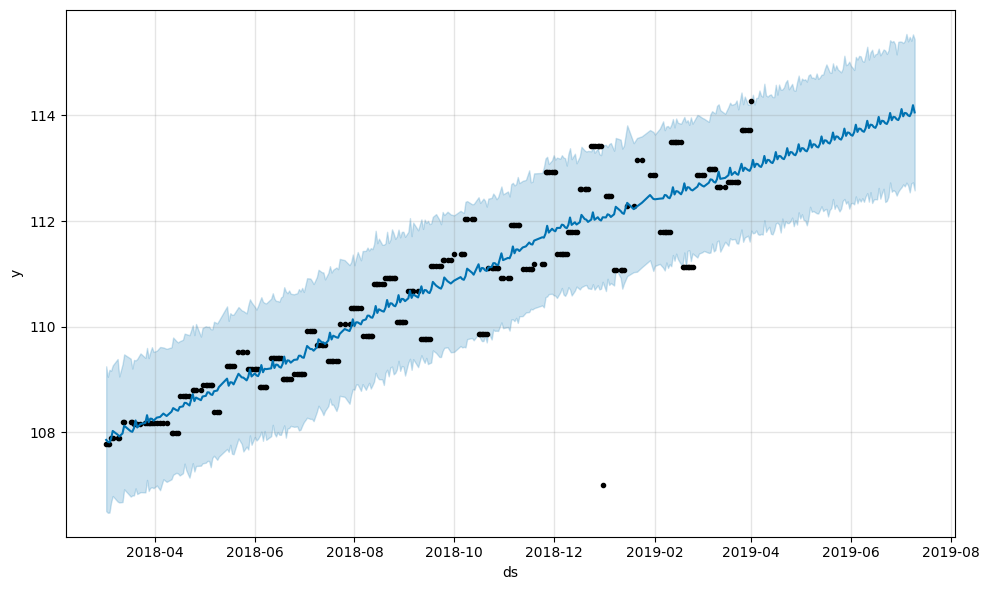

In [ ]:
plot1 = m.plot(forecast)

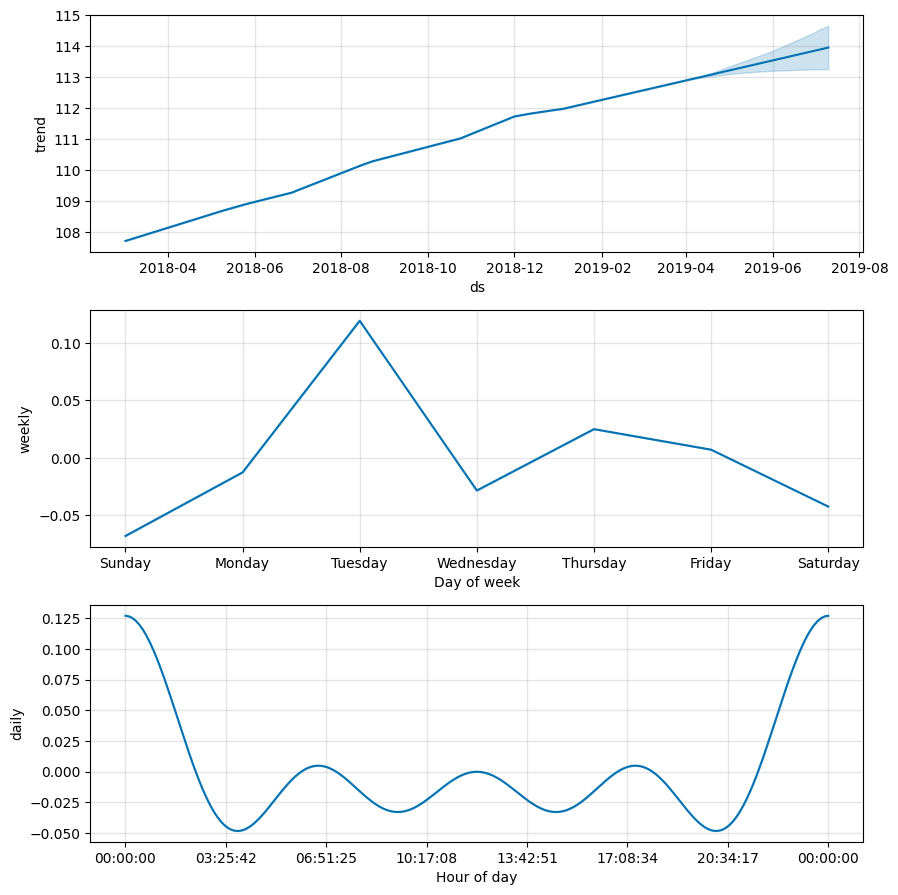

In [ ]:
plot2 = m.plot_components(forecast)

In [ ]:
test_df = test_df.merge(forecast[['ds', 'yhat']], left_on='dates', right_on='ds', how='left')
test_df.rename(columns={'yhat': 'prophet_forecast'}, inplace=True)
test_df.drop(columns=['ds'], inplace=True)

In [ ]:
test_df.head()

,dates,SKU,price_per_sku,AR_model_prediction,MA_model_prediction,ARMA_model_prediction,ARIMA_model_prediction,SARIMA_model_prediction,SES_model_prediction,prophet_forecast
0,2019-04-02,70252,114.280,113.725827,113.913051,113.976030,113.938112,113.938112,114.076294,113.158972
1,2019-04-05,70252,114.280,113.564684,113.634249,113.903110,113.642150,113.642150,114.076294,113.078598
2,2019-04-07,70252,114.280,113.456756,113.124349,113.831805,113.212950,113.212950,114.076294,113.024713
3,2019-04-08,70252,114.392,113.360262,112.931014,113.762076,113.026646,113.026646,114.076294,113.090568
4,2019-04-09,70252,114.392,113.228426,112.976165,113.693890,113.178750,113.178750,114.076294,113.232987


In [166]:
test_df.to_csv('prediction.csv')